In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import pandas as pd

from divopt.evaluation.process_results import load_results_dir

## Load results and display range of diverse hits

In [3]:
runs_base = "../runs/"

hyperparameter_dir = os.path.join(runs_base, "hyperparameter_search")
results = load_results_dir(hyperparameter_dir)
results.head()

,Task,Optimizer,Memory,n_molecules_total,valid_fraction,n_molecules_unique,n_solutions_time,n_diverse_all_time,n_diverse_novel_time,n_solutions_samples,...,time_budget,sample_budget,use_property_constraints,memory_known_active_init,n_jobs_scoring_function,config_fname,results_fname,n_molecules_valid,IntDiv_time,IntDiv_samples
0,DRD2,AugmentedHC,Div,52728,1.0,32481,703,178,44,703,...,600,10000,True,False,8,../runs/hyperparameter_search/DRD2_AugHC_7/con...,../runs/hyperparameter_search/DRD2_AugHC_7/res...,52728,0.791387,0.746933
1,DRD2,AugmentedHC,Div,53148,1.0,14889,319,93,16,319,...,600,10000,True,False,8,../runs/hyperparameter_search/DRD2_AugHC_9/con...,../runs/hyperparameter_search/DRD2_AugHC_9/res...,53148,0.778020,0.771838
2,DRD2,AugmentedHC,Div,55328,1.0,45100,1016,139,32,1016,...,600,10000,True,False,8,../runs/hyperparameter_search/DRD2_AugHC_3/con...,../runs/hyperparameter_search/DRD2_AugHC_3/res...,55328,0.788301,0.778846
3,DRD2,AugmentedHC,Div,57687,1.0,33262,646,115,30,646,...,600,10000,True,False,8,../runs/hyperparameter_search/DRD2_AugHC_6/con...,../runs/hyperparameter_search/DRD2_AugHC_6/res...,57687,0.790141,0.768589
4,DRD2,AugmentedHC,Div,57840,1.0,30674,725,164,43,725,...,600,10000,True,False,8,../runs/hyperparameter_search/DRD2_AugHC_12/co...,../runs/hyperparameter_search/DRD2_AugHC_12/re...,57840,0.797805,0.769046


In [4]:
# for each group of Task, Optimizer show information about the distribution of the results
results_grouped = results.groupby(["Task", "Optimizer"]).agg(
    {"n_diverse_all_time": ["max", "min", "std"], "n_diverse_all_samples": ["max", "min", "std"]}
)
results_grouped

n_diverse_all_time                  n_diverse_all_samples  \
                                 max  min         std                   max   
Task  Optimizer                                                               
DRD2  AugMemory                   90   11   25.606547                    90   
      AugmentedHC                267   16   72.939505                    71   
      BAR                        120   46   27.219916                    53   
      Gflownet                     1    0    0.457738                     1   
      GflownetDF                   1    0    0.258199                     1   
      GraphGA                    109   10   30.762222                    28   
      LSTM-HC                    576   71  134.134190                    77   
      LSTM-PPO                    51   12   10.102805                    21   
      Mars                         5    0    1.195229                     5   
      Mimosa                       8    2    1.567528                     8   
      Reinvent                   238    2   64.326696                    54   
      SmilesGA                     6    0    1.424279                     6   
      Stoned                       5    1    1.187234                     5   
GSK3β AugMemory                  868   29  225.376447                   672   
      AugmentedHC               2890  539  684.863226                   755   
      BAR                       1567   31  439.426358                   390   
      Gflownet                   177   21   53.152700                   148   
      GflownetDF                 151    2   40.789471                   123   
      GraphGA                    793  300  132.971998                   124   
      LSTM-HC                   2699  227  839.712366                   482   
      LSTM-PPO                   443  152   82.035010                   118   
      Mars                        12    1    3.246977                    50   
      Mimosa                      34   12    6.103863                    35   
      Reinvent                  1277  264  315.788688                   245   
      SmilesGA                    21    3    5.257195                    31   
      Stoned                      17    2    4.507137                    15   
JNK3  AugMemory                  215   15   57.168756                   170   
      AugmentedHC                506   12  167.228615                   140   
      BAR                        279   18   67.579230                    91   
      Gflownet                     1    0    0.258199                     0   
      GflownetDF                   1    0    0.351866                     1   
      GraphGA                    183   12   53.885947                    36   
      LSTM-HC                    734   50  226.359386                   110   
      LSTM-PPO                    45    7    9.803789                    14   
      Mars                         6    0    1.656157                     8   
      Mimosa                      11    2    2.503331                    11   
      Reinvent                   325    6   96.930658                    34   
      SmilesGA                     9    1    2.186539                    10   
      Stoned                       5    1    1.125463                     5   

                                    
                   min         std  
Task  Optimizer                     
DRD2  AugMemory     16   23.433188  
      AugmentedHC   15   17.922319  
      BAR           32    5.692100  
      Gflownet       0    0.414039  
      GflownetDF     0    0.258199  
      GraphGA        5    6.713171  
      LSTM-HC       22   15.131172  
      LSTM-PPO       8    3.239635  
      Mars           0    1.302013  
      Mimosa         2    1.709915  
      Reinvent       1   18.298582  
      SmilesGA       1    1.502379  
      Stoned         1    1.187234  
GSK3β AugMemory     55  169.075159  
      AugmentedHC  302   98.734468  
      BAR           31  105.17527

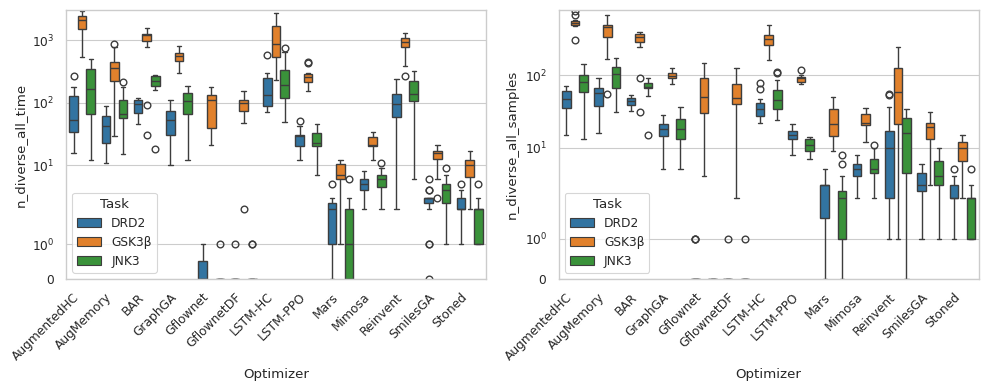

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper")

limit_names = ["time", "samples"]
# plot the distribution of the results
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for limit_name, ax in zip(limit_names, axes):
    plt.sca(ax)
    sns.boxplot(data=results, x="Optimizer", y=f"n_diverse_all_{limit_name}", hue="Task", ax=ax)
    plt.xticks(rotation=45, ha="right")
    plt.yscale("symlog")
    ylim = ax.get_ylim()
    ax.set_ylim(0, ylim[1])

plt.tight_layout()
plt.show()

### Show how hyperparameter selection needs to be done separately for time/sample constraint

In [6]:
# This shows how hyperparameter selection needs to be done separately for the
# two types of compute constraints
limit_names = ["time", "samples"]
max_dfs = {}
for cname in limit_names:
    idx_max = results.groupby(["Task", "Optimizer"])[f"n_diverse_all_{cname}"].idxmax()
    results_max_time = results.loc[idx_max]
    max_dfs[cname] = results_max_time.groupby(["Task", "Optimizer"]).agg(
        {"n_diverse_all_time": ["max"], "n_diverse_all_samples": ["max"]}
    )

ratios = (max_dfs["time"] / max_dfs["samples"]).applymap(lambda x: max(x, 1 / (x + 1e-15)))
ratios = ratios.pivot_table(index="Optimizer", columns="Task")
sort_idx = ratios.mean(1).sort_values(ascending=False)
ratios_sorted = ratios.loc[sort_idx.index]

# this table shows how many times better the optimizers are
# when they are tuned using the right metric. Some methods like
# LSTM-HC are highly sensitive to the used setting while others like
# AugmentedHC are not.
ratios_sorted

/tmp/ipykernel_60426/4159127787.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ratios = (max_dfs["time"] / max_dfs["samples"]).applymap(lambda x: max(x, 1 / (x + 1e-15)))


n_diverse_all_samples                         n_diverse_all_time  \
                              max                                        max   
Task                         DRD2     GSK3β          JNK3               DRD2   
Optimizer                                                                      
Gflownet             1.000000e+15  1.000000           NaN           1.000000   
GflownetDF           1.000000e+00  1.230000  1.000000e+15           1.000000   
LSTM-HC              2.750000e+00  1.564935  3.666667e+00           6.329670   
Reinvent             3.375000e+00  1.870229  2.125000e+00           2.016949   
Mars                 1.000000e+00  2.941176  1.000000e+00           1.000000   
LSTM-PPO             1.166667e+00  1.552632  1.000000e+00           1.645161   
AugMemory            1.058824e+00  1.335984  1.164384e+00           1.267606   
AugmentedHC          1.109375e+00  1.331570  1.386139e+00           1.628049   
GraphGA              1.000000e+00  1.458824  1.000000e+00           1.579710   
BAR                  1.204545e+00  1.000000  1.358209e+00           1.188119   
SmilesGA             1.000000e+00  1.476190  1.000000e+00           1.000000   
Mimosa               1.000000e+00  1.000000  1.100000e+00           1.000000   
Stoned               1.000000e+00  1.000000  1.000000e+00           1.000000   

                                 
                                 
Task            GSK3β      JNK3  
Optimizer                        
Gflownet     1.000000       inf  
GflownetDF   1.013423  1.000000  
LSTM-HC      3.551316  1.781553  
Reinvent     1.364316  1.136364  
Mars         4.000000  1.000000  
LSTM-PPO     2.621302  1.000000  
AugMemory    1.874730  1.482759  
AugmentedHC  1.141390  1.058577  
GraphGA      1.487805  1.000000  
BAR          1.000000  1.085603  
SmilesGA     1.166667  1.000000  
Mimosa       1.000000  1.222222  
Stoned       1.000000  1.000000

In [20]:
from copy import deepcopy

# plot feature importances
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# calculate feature importances for each metric
from sklearn.ensemble import RandomForestRegressor

from divopt.utils import filterdf


def get_df_opt(results, optimizer_name, task):
    df_opt = deepcopy(filterdf(results, {"Optimizer": optimizer_name, "Task": task})).reset_index(drop=True)
    df_args = df_opt["optimizer_args"].apply(pd.Series)
    # only keep columns with non-unique values
    df_args = df_args.loc[:, df_args.nunique() > 1]
    # drop n_jobs if in args
    if "n_jobs" in df_args.columns:
        df_args = df_args.drop(columns=["n_jobs"])

    # concat args with original df
    df_opt = pd.concat([df_opt, df_args], axis=1)

    # now drop all columns that are not n_diverse_all_time or n_diverse_all_samples or in df_args
    metric_cols = ["n_diverse_all_samples", "n_diverse_all_time"]
    df_opt = df_opt[list(df_args.columns) + metric_cols]
    return df_opt, metric_cols


def get_feature_importances(df, target, random_state=42):
    df = df.dropna()
    X_train = df
    y_train = target
    rf = RandomForestRegressor(n_estimators=100, random_state=random_state)
    rf.fit(X_train, y_train)
    feature_importances = pd.DataFrame(
        rf.feature_importances_, index=X_train.columns, columns=["importance"]
    ).sort_values("importance", ascending=False)
    return feature_importances


def plot_feature_importances(df_opt, metric_cols):
    fig, axs = plt.subplots(1, len(metric_cols), figsize=(8, 3))
    df_args = df_opt.drop(columns=metric_cols)
    args_sorted_by_fi = []
    for ax, metric_col in zip(axs, metric_cols):
        feature_importances = get_feature_importances(df_args, df_opt[metric_col])
        args_sorted_by_fi.append(feature_importances.index)
        sns.barplot(y="importance", x=feature_importances.index, data=feature_importances, ax=ax)
        ax.set_title(f"{metric_col}")
        ax.set_xticks(np.arange(len(feature_importances.index)))
        ax.set_xticklabels(feature_importances.index, rotation=30, horizontalalignment="right")
        ax.set_xlabel(None)
    plt.show()
    return args_sorted_by_fi

In [21]:
sns.set_theme(style="whitegrid")


def parallel_coordinates(df, metric_name):
    # Normalize the dataframe for visualization
    df_normalized = (df - df.min()) / (df.max() - df.min())

    # Create a colormap based on accuracy metric_name
    norm = plt.Normalize(df[metric_name].min(), df[metric_name].max())  # type: ignore
    colors = plt.cm.viridis(norm(df[metric_name]))  # type: ignore

    # Setup the figure and axis
    fig, ax = plt.subplots(figsize=(8, 4))

    # Plotting each individual data line
    for idx, line in df_normalized.iterrows():
        ax.plot(line.index, line.values, color=colors[idx], alpha=0.8, linewidth=2.5)

    # Enhance aesthetics
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation=45, fontsize=12)
    ax.set_ylim([-0.1, 1.1])  # Extend the limits for better view
    # ax.set_title("Parallel Coordinates Plot", fontsize=16)
    ax.yaxis.grid(True)
    ax.set_ylabel("Values", fontsize=14)

    # Create a custom legend
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap="viridis"), ax=ax)
    cbar.set_label(metric_name, fontsize=12)

    plt.tight_layout()
    plt.show()

Gflownet


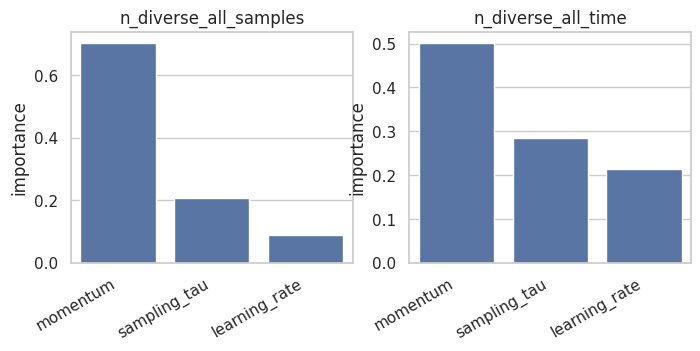

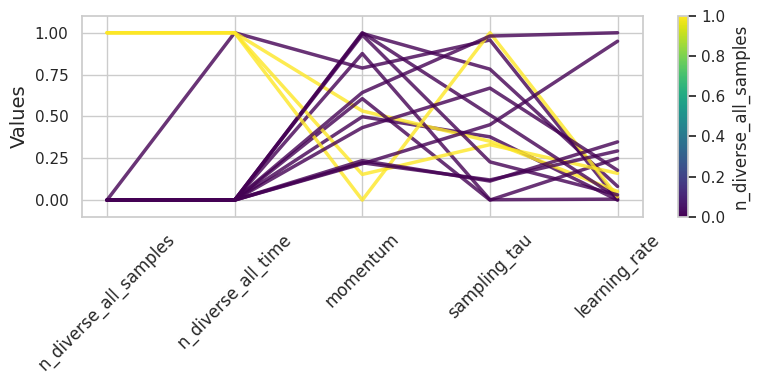

GflownetDF


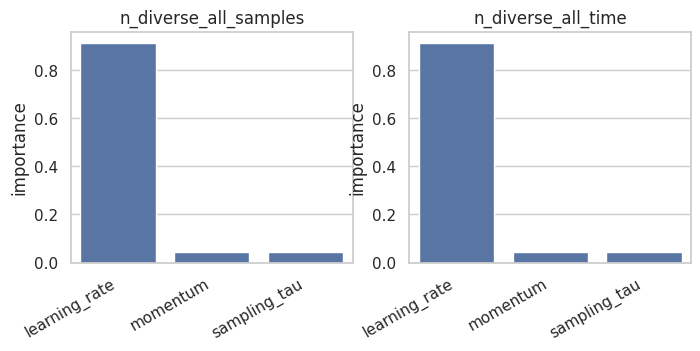

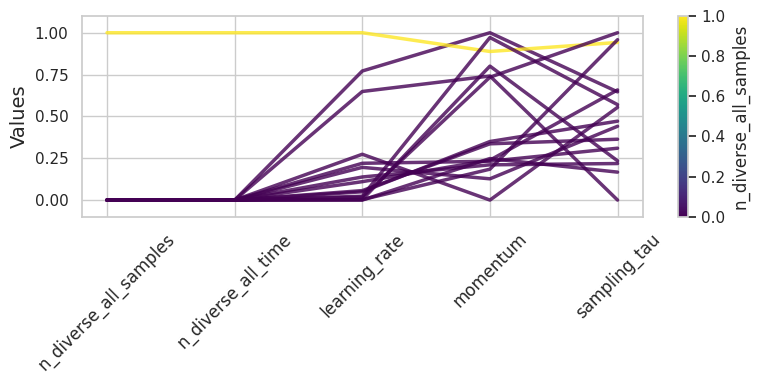

LSTM-HC


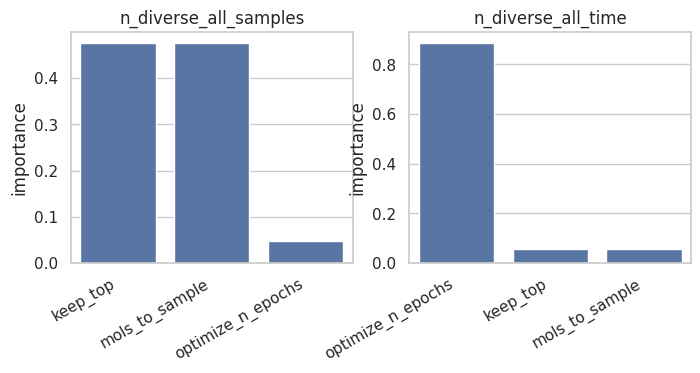

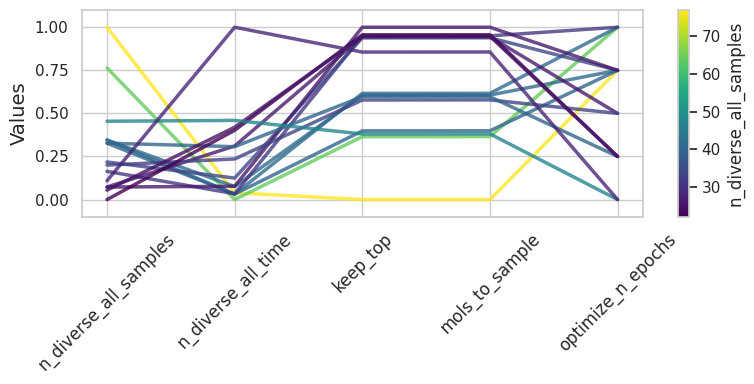

Reinvent


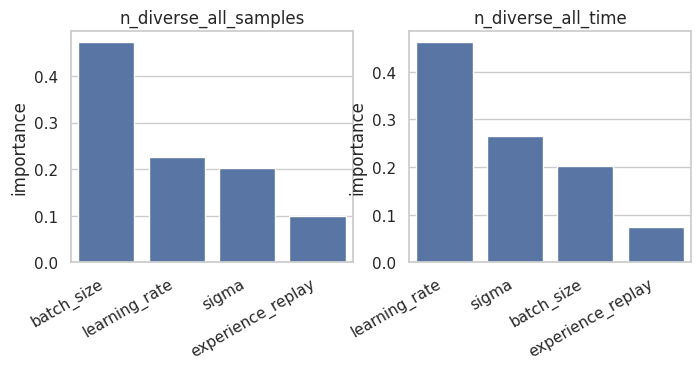

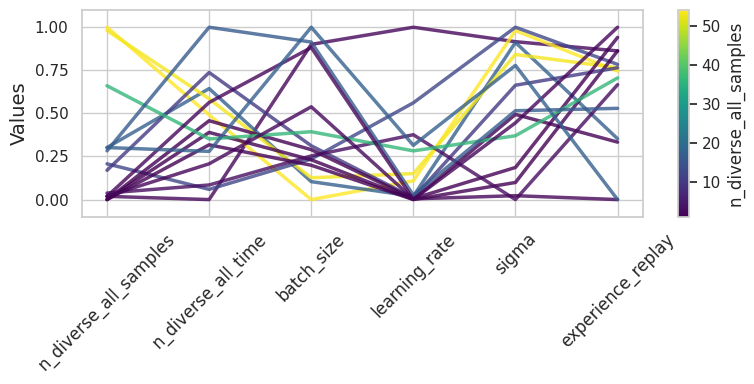

Mars


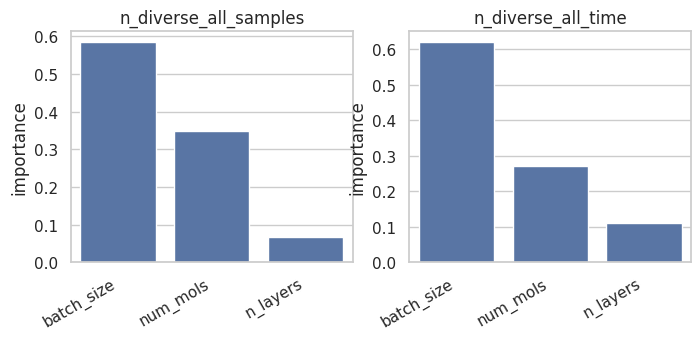

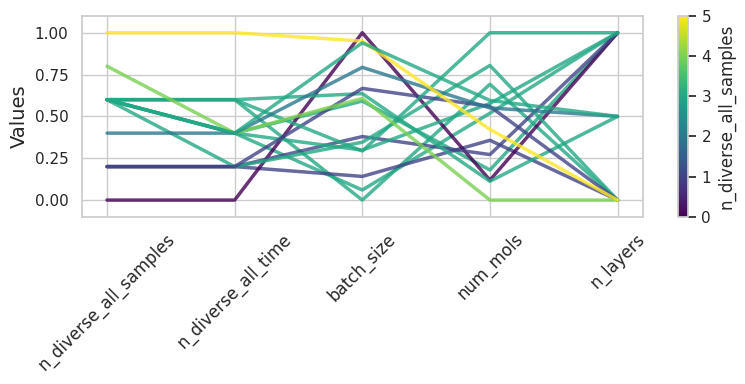

LSTM-PPO


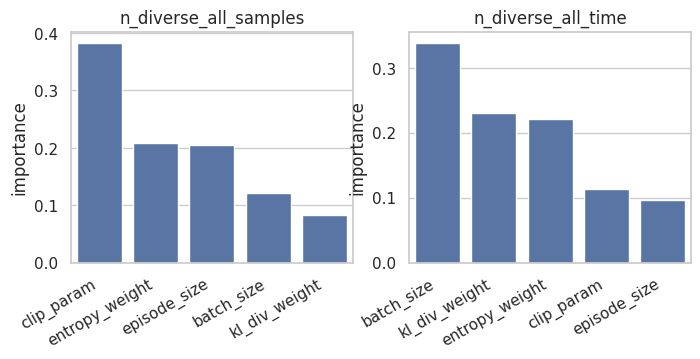

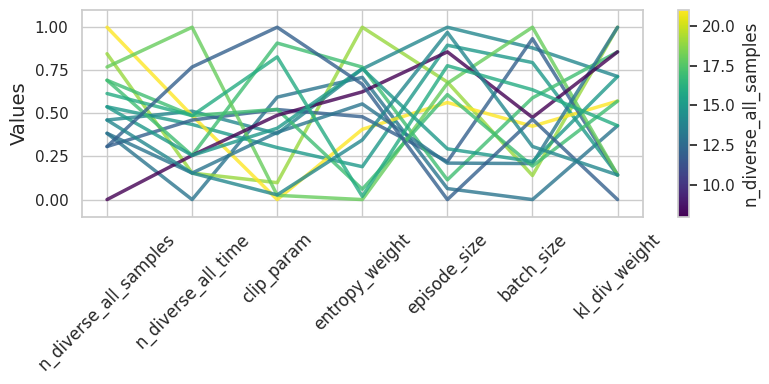

AugMemory


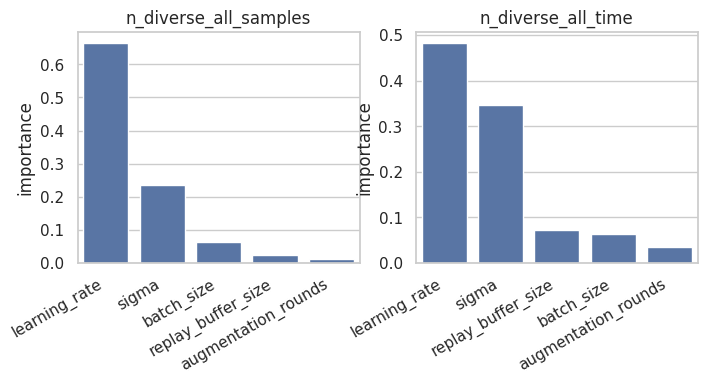

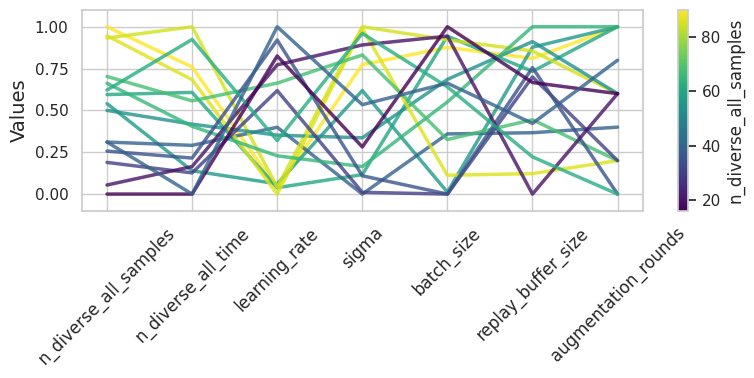

AugmentedHC


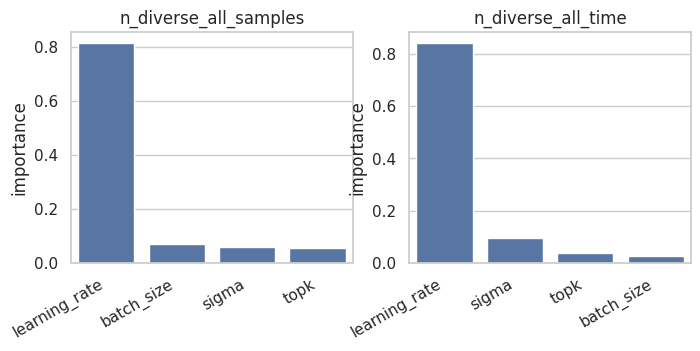

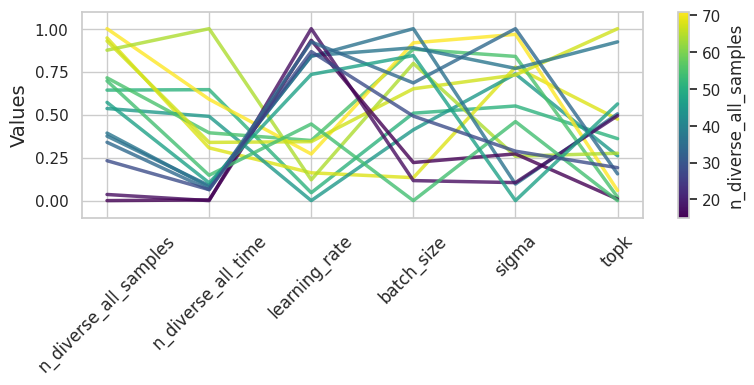

GraphGA


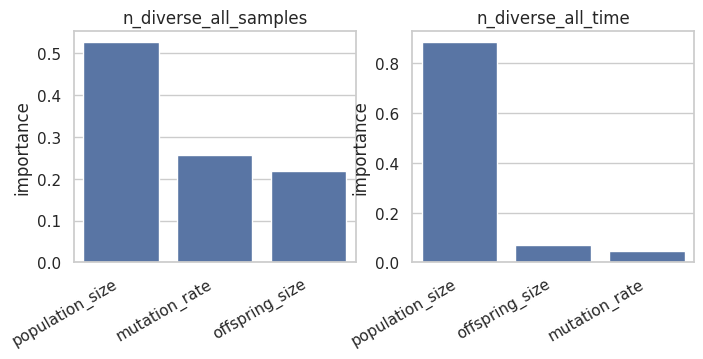

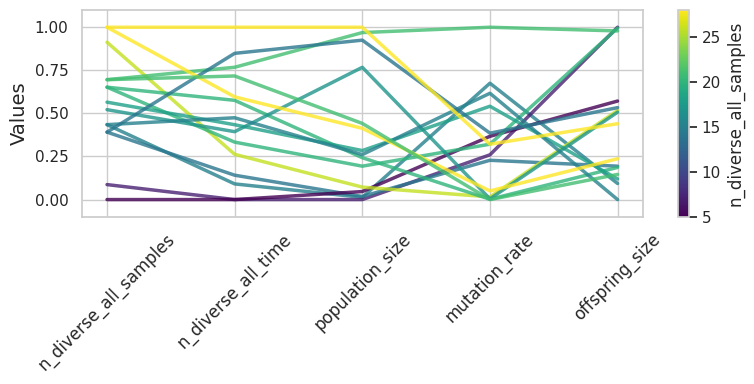

BAR


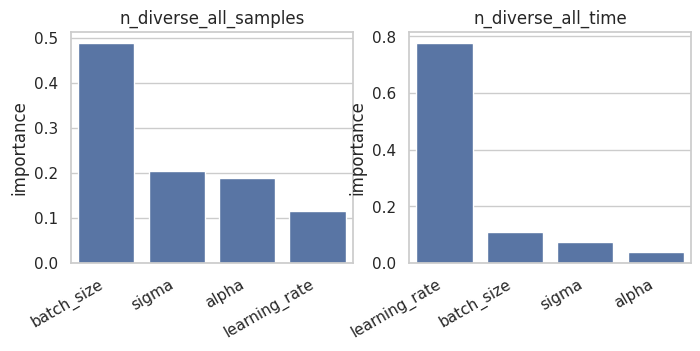

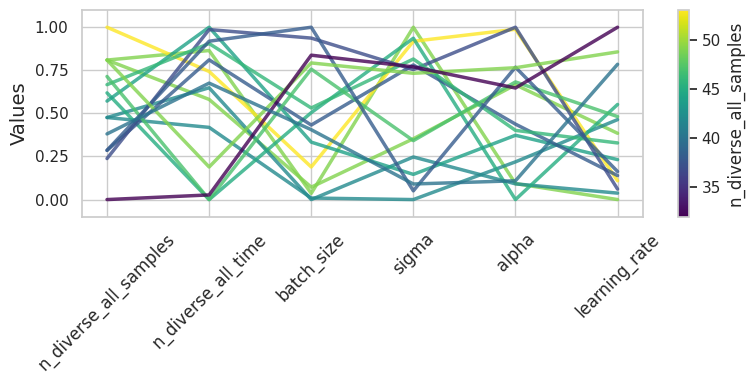

SmilesGA


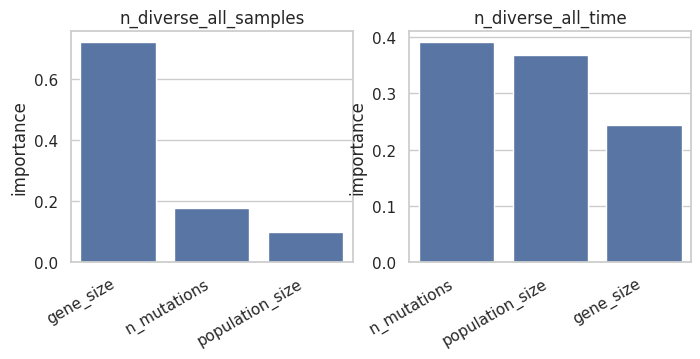

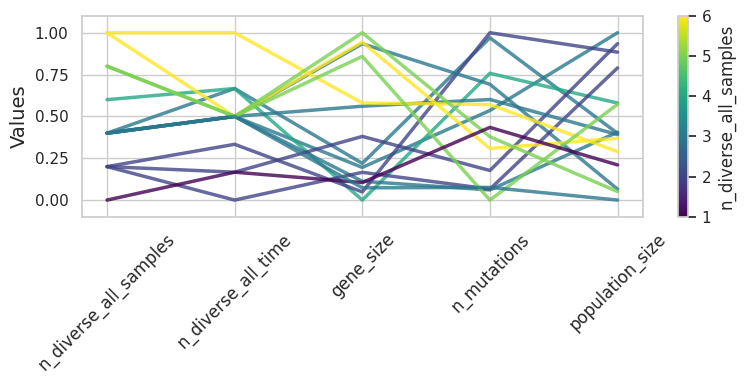

Mimosa


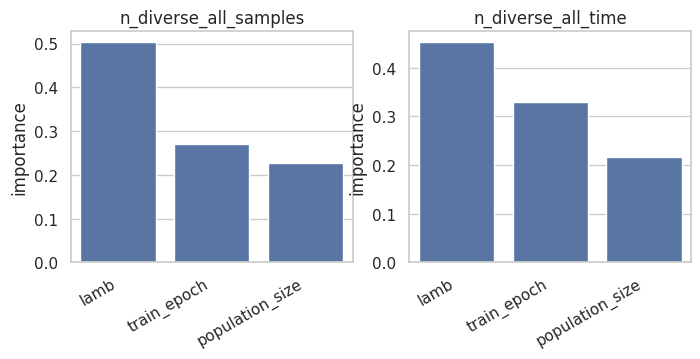

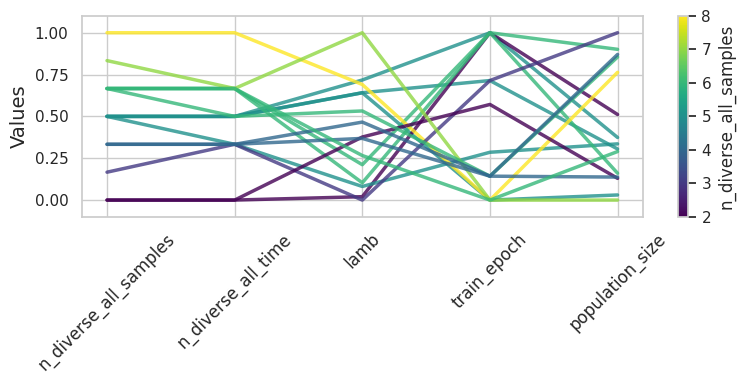

Stoned


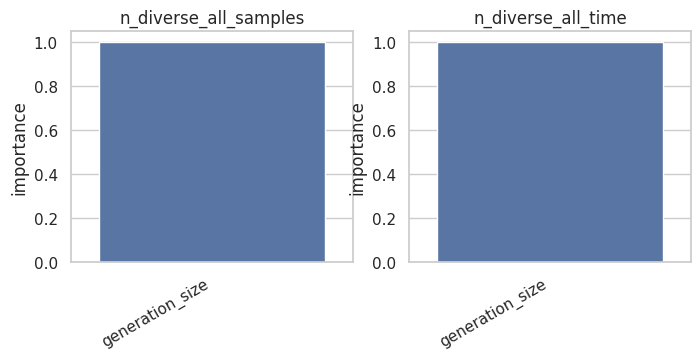

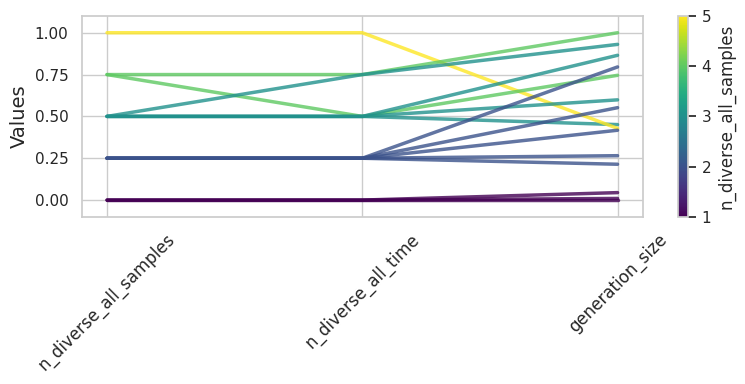

In [22]:
for opt_name in sort_idx.index:
    print(opt_name)
    df_opt, metric_cols = get_df_opt(results, optimizer_name=opt_name, task="DRD2")
    args_sorted_by_fi = plot_feature_importances(df_opt, metric_cols)
    df_opt = df_opt[
        metric_cols + args_sorted_by_fi[0].to_list()
    ]  # this index determines the sorting for parallel plots
    parallel_coordinates(df_opt, metric_cols[0])